In [1]:
import pandas as pd 
import numpy as np 

pseudo-codigo no overleaf
entender e explicar o pseudo codigo
validar simulacao


estado dos carros:
cp(j), cd(j), cb(j), cf(j), ct(j)
posicao - direcao - botoes - andares - tempo

M=10 pisos, N=2 carros

estados dos pisos:
ff(i)[], fb(i), ftc(i)
fila de pessoas, botao descer, botao subir, contador proxima chegada de pessoa

    
    Ts=3600 %para 1 hora
    ftc = inicializar
    M = 10
    N = 2
    lambda_value = 0.005
    
    for ts=1:Ts
        for i=1:M (para cada andar)
            if ftc(i) <= ts then
                ftc(i) = ftc(i) + exp(1/lambda);
                d = gera_dest();
                c = atribui_car(d)
                ff(i) <-- [ftc ,ta ,d ,c ]
                fb(d) = 1; %explicar  
            end if
        endfor-m
        
        for j=1:N (para cada elevador)
            if cp(j) mod 30 <> 0 then
                if cd(j) = 1 then
                    cp(j) = cp(j) + 1;
                if cd(j) = -1 then
                    cp(j) = cp(j) -1;
                else ERRO1;
            end if
                   
            if cp(j) mod 30 = 0 then
                f = quoc(cp(j) mod 30);
                buscar_passageiros(f, cf(j), cd(j)) --> explicar?
                descarregar_passageiros(f, cb(j), cd(j))
                atualizar_direcao()
                mover()
            end if
                
        endfor-N
    end-for-ts
    
    
Lembrete: toda vez que retira passageiros da s filas, salva os dados daquele passageiro [ftc, ta] num arquivo, que poder ser em disco ou em memória, para calcular média e variância do tempo de espera.

In [2]:
#carro
#variaveis do carro:  (CPj, CDj, CBj, CGj, CTj) car position, 
#car direction, clicked button, car get passengers waiting, temporizer
class Car:
    def __init__(self, name, car_position = 0, passengers = [], car_direction = 0, pressed_buttons = [], car_passengers_waiting = set(), temporizer = 0):
        self.car_position = car_position
        self.car_direction = car_direction
        self.pressed_buttons = pressed_buttons #destinos dos passageiros
        self.car_passengers_waiting = car_passengers_waiting #andares que passageiros entrarão
        self.temporizer = temporizer
        self.name = name
        self.passengers = passengers
        
    def car_action(self, floor):
        if (floor.number in self.pressed_buttons):
            #retira os  passageiros
            remove = 0
            for p in self.passengers:
                print("Teste saida: {} para {}".format(p.destination, floor.number))
                if (p.destination == floor.number):
                    print("passageiro sai")
                    remove +=1
                    
            for i in range(remove):
                for p in self.passengers:
                    if (p.destination == floor.number):
                        if (floor.number in self.pressed_buttons):
                            self.pressed_buttons.remove(floor.number)
                        #atualiza o attendance
                        p.attendance = self.temporizer
                        #salva nos passageiros atendidos
                        passengers_served.append(p)
                        #remove do elevador
                        self.passengers.remove(p)
                
        
        print("{} in {}".format(floor.number, self.car_passengers_waiting))
        self.update_direction()
        
        if (floor.number in self.car_passengers_waiting):
            print("Andar {}".format(floor.number))
            #pega os  passageiros
            passenger_still_waiting = False
            for p in floor.passengers_queue:
                if (p.selected_car == self.name):
                    if (p.destination > floor.number and self.car_direction == 1):
                        #entra
                        if (floor.number in self.car_passengers_waiting):
                            self.car_passengers_waiting.remove(floor.number)
                        #adiciona no elevador
                        self.passengers.append(p)
                        #remove do andar
                        floor.passengers_queue.remove(p)                        
                        print("passageiro entra")
                        self.pressed_buttons.append(p.destination)
                        p.boarding = self.temporizer
                        
                    elif (p.destination < floor.number and self.car_direction == -1):
                        #entra
                        if (floor.number in self.car_passengers_waiting):
                            self.car_passengers_waiting.remove(floor.number)
                        #adiciona no elevador
                        self.passengers.append(p)
                        #remove do andar
                        floor.passengers_queue.remove(p)                        
                        print("passageiro entra")
                        self.pressed_buttons.append(p.destination)
                        p.boarding = self.temporizer
                    else:
                        #print("ERROR2")
                        passenger_still_waiting = True
                        print("destination {} - andar {} - direcao {}".format(p.destination, floor.number, self.car_direction))
                        #print()
            if (passenger_still_waiting):
                self.car_passengers_waiting.add(floor.number)
        
        
    def update_direction(self):
        # atualiza direcao
        if (self.car_direction == 0):
            if (len(self.pressed_buttons) == 0):
                if (len(self.car_passengers_waiting) == 0):
                    print("car {} no action".format(self.name))
                else:
                    solicited_floor = list(self.car_passengers_waiting)[0]
                    current_floor = int(self.car_position/30)
                    if(solicited_floor > current_floor or solicited_floor == 0):
                        self.car_direction = 1
                        print("car {} - going up".format(self.name))
                    elif(solicited_floor < current_floor):
                        self.car_direction = -1
                        print("car {} - going down".format(self.name))
            else:
                solicited_floor = self.pressed_button[0]
                current_floor = int(self.car_position/30)
                if(solicited_floor > current_floor):
                    self.car_direction = 1
                    print("car {} - going up".format(self.name))
                elif(solicited_floor < current_floor):
                    self.car_direction = -1
                    print("car {} - going down".format(self.name))
                
        elif(self.car_direction == 1):
            if (len(self.pressed_buttons) == 0):
                if (len(self.car_passengers_waiting) == 0):
                    #se nao tem requisicoes para
                    self.car_direction = 0
                    print("car {} no action".format(self.name))
                else:
                    current_floor = int(self.car_position/30)
                    keep_going = False
                    #verifica se tem requisicao pra subir
                    for solicited_floors in self.car_passengers_waiting:
                        if(solicited_floors > current_floor):
                            print("car {} - going up".format(self.name))
                            keep_going = True
                            break
                            
                    #verifica se tem pra descer
                    if(not keep_going):
                        for solicited_floors in self.car_passengers_waiting:
                            if(solicited_floors < current_floor):
                                self.car_direction = -1
                                print("car {} - going down".format(self.name))
                                break
                                
            else:
                current_floor = int(self.car_position/30)
                keep_going = False
                for solicited_floors in self.pressed_buttons:
                    if(solicited_floors > current_floor):
                        self.car_direction = 1
                        print("car {} - going up".format(self.name))
                        keep_going = True
                        break
                        
                for solicited_floors in self.car_passengers_waiting:
                    if(solicited_floors > current_floor):
                        self.car_direction = 1
                        print("car {} - going up".format(self.name))
                        keep_going = True
                        break   
                        
                if(not keep_going):
                    for solicited_floors in self.pressed_buttons:
                        if(solicited_floors < current_floor):
                            self.car_direction = -1
                            print("car {} - going down".format(self.name))
                            break
                        
                    for solicited_floors in self.car_passengers_waiting:
                        if(solicited_floors < current_floor):
                            self.car_direction = -1
                            print("car {} - going down".format(self.name))
                            break
                            
        else:
            if (len(self.pressed_buttons) == 0):
                if (len(self.car_passengers_waiting) == 0):
                    #se nao tem requisicoes para
                    self.car_direction = 0
                    print("car {} no action".format(self.name))
                else:
                    current_floor = int(self.car_position/30)
                    keep_going = False
                    #verifica se tem requisicao pra descer
                    for solicited_floors in self.car_passengers_waiting:
                        if(solicited_floors < current_floor):
                            print("car {} - going down".format(self.name))
                            keep_going = True
                            break
                            
                    #verifica se tem pra subir
                    if(not keep_going):
                        for solicited_floors in self.car_passengers_waiting:
                            if(solicited_floors > current_floor):
                                self.car_direction = 1
                                print("car {} - going up".format(self.name))
                                break
            else:
                current_floor = int(self.car_position/30)
                keep_going = False
                for solicited_floors in self.pressed_buttons:
                    if(solicited_floors < current_floor):
                        print("car {} - going down".format(self.name))
                        keep_going = True
                        break
                        
                for solicited_floors in self.car_passengers_waiting:
                    if(solicited_floors < current_floor):
                        print("car {} - going down".format(self.name))
                        keep_going = True
                        break   
                        
                if(not keep_going):
                    for solicited_floors in self.pressed_buttons:
                        if(solicited_floors > current_floor):
                            self.car_direction = 1
                            print("car {} - going up".format(self.name))
                            break
                        
                    for solicited_floors in self.car_passengers_waiting:
                        if(solicited_floors > current_floor):
                            self.car_direction = 1
                            print("car {} - going up".format(self.name))
                            break
                            
    def new_passager_waiting(self, floor):
        self.car_passengers_waiting.add(floor.number)
        

In [3]:
from random import choice
import random
#andar
#ff(i)[], fb(i), ftc(i) ->
#fila de pessoas, botao descer, botao subir, contador proxima chegada de pessoa
class Floor:
    def __init__(self, number, passengers_queue = [], up_button = 0, down_button =  0, passagers_next_flow = int(np.random.exponential(1/0.004))):
        self.passengers_queue = passengers_queue
        self.up_button = up_button
        self.down_button = down_button
        self.passagers_next_flow = passagers_next_flow
        self.number = number
        
    def random_destination(self):
        return choice([i for i in range(0,10) if i not in [self.number]])
    
    def pure_up_destination(self):
        return choice([i for i in range(0,10) if i > self.number])
    
    def down_peak_destination(self):
        #90% descem e 10% sobem
        rand = random.uniform(0, 1)
        if rand <= 0.9 and self.number != 0:
            return choice([i for i in range(0,self.number) if i not in [self.number]])
        else:
            return choice([i for i in range(0,10) if i not in [self.number]])
        #         probs = []
#         down_floors = self.number
#         up_floors = 9 - self.number
#         for f in range(0,10):
#             if (f == self.number):
#                 probs.append(0)
#             elif (f < self.number):
#                 probs.append(0.9/down_floors)
#             elif (f > self.number):
#                 probs.append(0.1/up_floors)
        #print("floor: {} - probs: {}".format(self.number, probs))
#         return np.random.choice([i for i in range(0,10) if i not in [self.number]], 1, probs)[0]
      
    

        

In [4]:
class Passager:
    def __init__(self, destination, arrive, selected_car, initial_floor, boarding, attendance):
        self.destination = destination
        self.arrive = arrive
        self.boarding = boarding
        self.attendance = attendance
        self.selected_car = selected_car
        self.initial_floor = initial_floor
    
    def __repr__(self):
        return "<Passager arrive:%s boarding:%s attendance:%s boarding_time:%s attendance_time:%s car:%s>" % (self.arrive, self.boarding, self.attendance, self.boarding - self.arrive, self.attendance - self.arrive, self.selected_car)

    def __str__(self):
        return "<Arrive:%s, Boarding:%s, Attendance:%s, Boarding_time:%s, Attendance_time:%s, Car:%s" % (self.arrive, self.boarding, self.attendance, self.boarding - self.arrive, self.attendance - self.arrive, self.selected_car)

In [5]:
#inicializacao 3600 iteracoes, 2 carros e 10 andares (0 a 9)
timer = 900
floor_number = 10
car_number = 2
lambda_value = 3 #0.0055
simulation_type = 'PURE_UP' # ['DOWN_PEAK', 'RANDOM', 'PURE_DOWN', 'PURE_UP']

passengers_served = []
cars = []
floors = []
names = ['A', 'B', 'C']
for x in range(car_number):
    cars.append(Car(name = names[x], pressed_buttons = [], passengers = [] , car_passengers_waiting = set()))

for x in range(floor_number):
    #print(int(np.random.exponential(1/0.004)))
    floors.append(Floor(number = x, passagers_next_flow = int(np.random.exponential(1/lambda_value)), passengers_queue= []))

In [6]:
def select_best_car(floor):
    #substituir carro mais proximo    
    smaller = 999999999
    for c in cars:
        if abs(floor.number - (c.car_position/30)) <= smaller:
            smaller = abs(floor.number - (c.car_position/30))
            print("floor {} - car: {} - name {}".format(floor.number, c.car_position/30, c.name))
            min_dist = c
    return min_dist

In [7]:
def make_analyzes(passengers_served):
    column_names = ['arrive', 'boarding', 'attendance', 'selected_car', 'initial_floor', 'destination']
    df = pd.DataFrame([[getattr(i,j) for j in column_names] for i in passengers_served], columns = column_names)
    #add boarding_time and attendance_time
    df['wait_time'] = df.apply(lambda row: row.boarding - row.arrive, axis=1)
    df['journey_time'] = df.apply(lambda row: row.attendance - row.boarding, axis=1)
    df['total_time'] = df.apply(lambda row: row.attendance - row.arrive, axis=1)
    print(df)
    return df

In [8]:
for iteration in range(timer):
    floor = None 
    car = None
    selected_car = None
    for floor in floors:
        #print("Andar {} - fila {}".format(floor.number, floor.passengers_queue))
        if floor.passagers_next_flow <= iteration:
            e = np.random.exponential(1/lambda_value)
            floor.passagers_next_flow = floor.passagers_next_flow + e
            #print("Andar {} - tempo {} - flow do andar {}".format(floor.number, iteration, floor.passagers_next_flow))
            if (simulation_type == 'RANDOM'):
                d = floor.random_destination()
            elif (simulation_type == 'PURE_DOWN'):
                if (floor.number == 0):
                    continue
                d = 0
            elif (simulation_type == 'PURE_UP'):
                if (floor.number != 0):
                    continue
                d = floor.pure_up_destination()
            elif (simulation_type == 'DOWN_PEAK'):
                #145 descem e 15 sobem
                d = floor.down_peak_destination()
            
            selected_car = select_best_car(floor)
            #print("Floor: {} - Best Car {}".format(floor.number, selected_car.name))
            p = Passager(arrive = iteration, initial_floor = floor.number, destination = d, selected_car = selected_car.name, boarding = 0, attendance = 0)
            floor.passengers_queue.append(p)
            selected_car.new_passager_waiting(floor)
    
    for car in cars:
        car.temporizer = iteration
        
        if (car.car_position % 30 != 0):
            if (car.car_direction == 1):
                car.car_position += 1
            elif (car.car_direction == -1):
                car.car_position -= 1
            else:
                print("ERROR1")
            
        elif (car.car_position % 30 == 0):
            
            f = int(car.car_position/30)
            floor = floors[f]
            car.car_action(floor)
            print("Carro: {} - Andar {} - fila de passageiros {} - fila de andares {}".format(car.name, int(car.car_position/30), car.pressed_buttons, car.car_passengers_waiting))
            if (car.car_direction == 1):
                car.car_position += 1
            elif (car.car_direction == -1):
                car.car_position -= 1
            elif (len(car.pressed_buttons) == 0 and len(car.car_passengers_waiting) == 0):
                pass
            else:
                print("ERROR1.1")
            
#print(passengers_served)
result_df = make_analyzes(passengers_served)


floor 0 - car: 0.0 - name A
floor 0 - car: 0.0 - name B
0 in set()
car A no action
Carro: A - Andar 0 - fila de passageiros [] - fila de andares set()
0 in {0}
car B - going up
Andar 0
passageiro entra
Carro: B - Andar 0 - fila de passageiros [2] - fila de andares set()
floor 0 - car: 0.0 - name A
0 in {0}
car A - going up
Andar 0
passageiro entra
Carro: A - Andar 0 - fila de passageiros [5] - fila de andares set()
floor 0 - car: 0.03333333333333333 - name A
floor 0 - car: 0.06666666666666667 - name A
floor 0 - car: 0.1 - name A
floor 0 - car: 0.13333333333333333 - name A
floor 0 - car: 0.16666666666666666 - name A
floor 0 - car: 0.2 - name A
floor 0 - car: 0.23333333333333334 - name A
floor 0 - car: 0.26666666666666666 - name A
floor 0 - car: 0.3 - name A
floor 0 - car: 0.3333333333333333 - name A
floor 0 - car: 0.36666666666666664 - name A
floor 0 - car: 0.4 - name A
floor 0 - car: 0.43333333333333335 - name A
floor 0 - car: 0.4666666666666667 - name A
floor 0 - car: 0.5 - name A
flo

Teste saida: 8 para 3
Teste saida: 3 para 3
passageiro sai
Teste saida: 8 para 3
Teste saida: 7 para 3
Teste saida: 7 para 3
Teste saida: 7 para 3
Teste saida: 9 para 3
Teste saida: 3 para 3
passageiro sai
Teste saida: 8 para 3
Teste saida: 7 para 3
Teste saida: 4 para 3
Teste saida: 5 para 3
Teste saida: 6 para 3
Teste saida: 9 para 3
Teste saida: 6 para 3
Teste saida: 6 para 3
Teste saida: 4 para 3
Teste saida: 8 para 3
Teste saida: 5 para 3
Teste saida: 4 para 3
Teste saida: 6 para 3
Teste saida: 9 para 3
Teste saida: 5 para 3
Teste saida: 5 para 3
Teste saida: 4 para 3
Teste saida: 5 para 3
Teste saida: 6 para 3
Teste saida: 9 para 3
Teste saida: 3 para 3
passageiro sai
Teste saida: 5 para 3
Teste saida: 9 para 3
Teste saida: 3 para 3
passageiro sai
Teste saida: 8 para 3
Teste saida: 5 para 3
Teste saida: 3 para 3
passageiro sai
Teste saida: 3 para 3
passageiro sai
Teste saida: 9 para 3
Teste saida: 4 para 3
Teste saida: 7 para 3
Teste saida: 3 para 3
passageiro sai
3 in {0}
car A 

passageiro entra
passageiro entra
passageiro entra
passageiro entra
passageiro entra
passageiro entra
passageiro entra
Carro: B - Andar 0 - fila de passageiros [3, 1, 6, 2, 6, 4, 6, 2, 7, 1, 3, 2, 7, 6, 7, 3, 7, 1, 1, 1, 3, 4, 6, 6, 4, 2, 6, 1, 8, 4, 8, 3, 2, 6, 7, 5, 6, 2, 6, 1, 4, 1, 4, 9, 4, 8, 6, 4, 1, 1, 9, 5, 7, 2, 2, 8, 6, 8, 2, 3, 9, 7, 6, 8, 3, 5, 9, 9, 8, 7, 9, 7, 4, 3, 3, 6, 6, 9, 9, 3, 4, 8, 4, 7, 3, 1, 3, 2, 8, 6, 2, 4, 1, 1, 6, 1, 5, 1, 9, 8, 4, 6, 9, 3, 1, 6, 6, 9, 1, 6, 9, 6, 3, 6, 4, 5, 1, 1, 6, 7, 5, 9, 9, 8, 7, 1, 5, 4, 3, 6, 5, 8, 6, 9, 6, 3, 3, 4, 3, 9, 7, 7, 5, 6, 7, 8, 9, 3, 9, 7, 2, 3, 3, 3, 9, 2, 6, 7, 2, 5, 9, 5, 5, 5, 6, 4, 9, 1, 7, 1, 6, 5, 8, 5, 1, 3, 8, 2, 4, 7, 4, 3, 2, 9, 7, 8, 7, 6, 2, 9, 1, 1, 3, 4, 4, 6] - fila de andares set()
floor 0 - car: 1.9666666666666666 - name A
floor 0 - car: 0.03333333333333333 - name B
floor 0 - car: 1.9333333333333333 - name A
floor 0 - car: 0.06666666666666667 - name B
floor 0 - car: 1.9 - name A
floor 0 - car: 0.1 - name

In [9]:
result_df.describe()

,arrive,boarding,attendance,initial_floor,destination,wait_time,journey_time,total_time
count,193.000000,193.000000,193.000000,193.0,193.000000,193.000000,193.000000,193.000000
mean,213.373057,362.860104,494.984456,0.0,4.404145,149.487047,132.124352,281.611399
std,176.918401,195.384946,176.063686,0.0,2.774959,161.270965,83.248781,161.921854
min,0.000000,0.000000,60.000000,0.0,1.000000,0.000000,30.000000,32.000000
25%,91.000000,241.000000,391.000000,0.0,2.000000,43.000000,60.000000,170.000000
50%,177.000000,361.000000,451.000000,0.0,4.000000,89.000000,120.000000,244.000000
75%,294.000000,361.000000,541.000000,0.0,7.000000,176.000000,210.000000,365.000000
max,833.000000,841.000000,871.000000,0.0,9.000000,775.000000,270.000000,805.000000


In [10]:
#result_df
#mean 
means = result_df.mean(axis=0, numeric_only=True)  
print("Media chegada do elevador {}".format(means.wait_time))
print("Media de jornada no elevador {}".format(means.journey_time))
print("Media tempo de atendimento {}".format(means.total_time))
#result_df.var(axis=0)
print("-----------")
#variance      
variances = result_df.var(axis=0)  
print("Var chegada do elevador {}".format(variances.wait_time))
print("Var jornada no elevador {}".format(variances.journey_time))
print("Var tempo de atendimento {}".format(variances.total_time))
print("-----------")
stds = result_df.std(axis=0)  
print("Des. padrao chegada do elevador {}".format(stds.wait_time))
print("Des. padrao jornada no elevador {}".format(stds.journey_time))
print("Des. padrao tempo de atendimento {}".format(stds.total_time))

Media chegada do elevador 149.48704663212436
Media de jornada no elevador 132.12435233160622
Media tempo de atendimento 281.61139896373055
-----------
Var chegada do elevador 26008.324050086358
Var jornada no elevador 6930.35945595855
Var tempo de atendimento 26218.686744386872
-----------
Des. padrao chegada do elevador 161.270964683933
Des. padrao jornada no elevador 83.24878050733567
Des. padrao tempo de atendimento 161.92185381963384


In [11]:
import math  
result_df.hist(column=['wait_time'], bins= int(math.sqrt(len(result_df.index))))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d802027b8>]], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d7fea5e48>]], dtype=object)

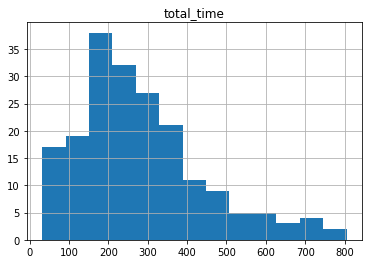

In [12]:
result_df.hist(column=['total_time'], bins= int(math.sqrt(len(result_df.index))))

In [13]:
result_df['direction'] = result_df.apply(lambda row: row.destination > row.initial_floor, axis=1)
result_df = result_df.replace(True, 'UP')
result_df = result_df.replace(False, 'DOWN')

In [14]:
result_df['time'] = result_df.apply(lambda row: int(row.arrive/60) , axis=1)

In [15]:
#result_df

In [16]:
result_df.groupby(['time', 'direction'])['arrive'].count()

time  direction
0     UP           31
1     UP           33
2     UP           34
3     UP           32
4     UP           17
5     UP           30
6     UP            1
10    UP            6
11    UP            4
13    UP            5
Name: arrive, dtype: int64